In [5]:
%matplotlib inline

02. Predict with pre-trained Faster RCNN models
==============================================

This article shows how to play with pre-trained Faster RCNN model.

First let's import some necessary libraries:


In [6]:
! pip install gluoncv

In [7]:
from matplotlib import pyplot as plt
import gluoncv
from gluoncv import model_zoo, data, utils

Load a pretrained model
-------------------------

Let's get an Faster RCNN model trained on Pascal VOC
dataset with ResNet-50 backbone. By specifying
``pretrained=True``, it will automatically download the model from the model
zoo if necessary. For more pretrained models, please refer to
:doc:`../../model_zoo/index`.

The returned model is a HybridBlock :py:class:`gluoncv.model_zoo.FasterRCNN`
with a default context of `cpu(0)`.



In [8]:
net = model_zoo.get_model('faster_rcnn_resnet50_v1b_voc', pretrained=True)

Pre-process an image
--------------------

Next we download an image, and pre-process with preset data transforms.
The default behavior is to resize the short edge of the image to 600px.
But you can feed an arbitrarily sized image.

You can provide a list of image file names, such as ``[im_fname1, im_fname2,
...]`` to :py:func:`gluoncv.data.transforms.presets.rcnn.load_test` if you
want to load multiple image together.

This function returns two results. The first is a NDArray with shape
`(batch_size, RGB_channels, height, width)`. It can be fed into the
model directly. The second one contains the images in numpy format to
easy to be plotted. Since we only loaded a single image, the first dimension
of `x` is 1.

Please beware that `orig_img` is resized to short edge 600px.



In [9]:
! pip install utils

In [10]:
im_fname = utils.download('https://media.istockphoto.com/photos/happy-friends-picture-id641126440?k=6&m=641126440&s=612x612&w=0&h=vuFR6aY-z4EVB4OJ3nitdh1kox4Htoe-CCGExCSYNac=',
                          path='grop.jpg')
im_fname2 = utils.download('https://c8.alamy.com/comp/EC1K41/indian-college-group-friends-fun-EC1K41.jpg', path= 'human2')
x, orig_img1 = data.transforms.presets.rcnn.load_test(im_fname)
x, orig_img2 = data.transforms.presets.rcnn.load_test(im_fname2)

100%|██████████| 45/45 [00:00<00:00, 1721.42KB/s]


Inference and display
---------------------

The Faster RCNN model returns predicted class IDs, confidence scores,
bounding boxes coordinates. Their shape are (batch_size, num_bboxes, 1),
(batch_size, num_bboxes, 1) and (batch_size, num_bboxes, 4), respectively.

We can use :py:func:`gluoncv.utils.viz.plot_bbox` to visualize the
results. We slice the results for the first image and feed them into `plot_bbox`:



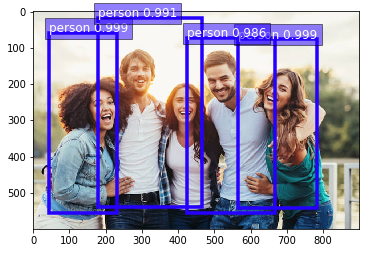

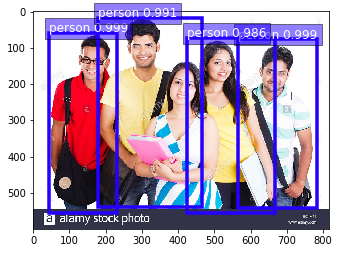

In [11]:
box_ids, scores, bboxes = net(x)
ax = utils.viz.plot_bbox(orig_img1, bboxes[0], scores[0], box_ids[0], class_names=net.classes)
ax = utils.viz.plot_bbox(orig_img2, bboxes[0], scores[0], box_ids[0], class_names=net.classes)

plt.show()

In [12]:
! pip install pytube


In [13]:
! pip install opencv-python --user


In [14]:
import time

import cv2
import gluoncv as gcv
import mxnet as mx

net = gcv.model_zoo.get_model('ssd_512_mobilenet1.0_voc', pretrained=True)

 
    

   

C:\Users\rakes\Anaconda3\lib\site-packages\mxnet\gluon\block.py:1159: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


In [15]:
cap = opencv.VideoCapture(0)

NameError: name 'opencv' is not defined

In [ ]:
 axes = None
    NUM_FRAMES = 200 # you can change this
    for i in range(NUM_FRAMES):
        # Load frame from the camera
        ret, frame = cap.read()

        # Image pre-processing
        frame = mx.nd.array(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)).astype('uint8')
        rgb_nd, frame = gcv.data.transforms.presets.ssd.transform_test(frame, short=512, max_size=700)

        # Run frame through network
        class_IDs, scores, bounding_boxes = net(rgb_nd)

        # Display the result
        img = gcv.utils.viz.cv_plot_bbox(frame, bounding_boxes[0], scores[0], class_IDs[0], class_names=net.classes)
        gcv.utils.viz.cv_plot_image(img)
        cv2.waitKey(1)

